In [ ]:
%tensorflow_version 1.x
!pip install numpy==1.17

TensorFlow 1.x selected.
     |████████████████████████████████| 20.4MB 157kB/s 
ERROR: tensorflow 1.15.2 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.18.3
    Uninstalling numpy-1.18.3:
      Successfully uninstalled numpy-1.18.3


In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
   raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
print(tf.__version__)

Found GPU at: /device:GPU:0
1.15.2


In [ ]:
!git clone https://github.com/tensorflow/models.git

Cloning into 'models'...
remote: Enumerating objects: 34407, done.
remote: Total 34407 (delta 0), reused 0 (delta 0), pack-reused 34407
Receiving objects: 100% (34407/34407), 512.35 MiB | 32.47 MiB/s, done.
Resolving deltas: 100% (22204/22204), done.
Checking out files: 100% (2484/2484), done.


In [ ]:
!apt-get install protobuf-compiler python-pil python-lxml python-tk
!pip install Cython

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
python-tk is already the newest version (2.7.17-1~18.04).
The following additional packages will be installed:
  python-bs4 python-chardet python-html5lib python-olefile
  python-pkg-resources python-six python-webencodings
Suggested packages:
  python-genshi python-lxml-dbg python-lxml-doc python-pil-doc python-pil-dbg
  python-setuptools
The following NEW packages will be installed:
  python-bs4 python-chardet python-html5lib python-lxml python-olefile
  python-pil python-pkg-resources python-six python-webencodings
0 upgraded, 9 newly installed, 0 to remove and 25 not upgraded.
Need to get 1,818 kB of archives.
After this operation, 7,685 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 python-bs4 all 4.6.0-1 [67.9 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd

In [ ]:
%cd /content/models/research/
!protoc object_detection/protos/*.proto --python_out=.

/content/models/research


In [ ]:
import os
os.environ['PYTHONPATH'] += ':/content/models/research/:/content/models/research/slim'

In [ ]:
!python setup.py build
!python setup.py install

running build
running build_py
creating build
creating build/lib
creating build/lib/object_detection
copying object_detection/exporter.py -> build/lib/object_detection
copying object_detection/model_lib.py -> build/lib/object_detection
copying object_detection/export_tflite_ssd_graph_lib.py -> build/lib/object_detection
copying object_detection/model_hparams.py -> build/lib/object_detection
copying object_detection/export_tflite_ssd_graph_lib_test.py -> build/lib/object_detection
copying object_detection/inputs_test.py -> build/lib/object_detection
copying object_detection/model_tpu_main.py -> build/lib/object_detection
copying object_detection/exporter_test.py -> build/lib/object_detection
copying object_detection/export_inference_graph.py -> build/lib/object_detection
copying object_detection/eval_util_test.py -> build/lib/object_detection
copying object_detection/inputs.py -> build/lib/object_detection
copying object_detection/model_lib_v2_test.py -> build/lib/object_detection
copyi

In [ ]:
%cd /content/
!wget http://cvrr.ucsd.edu/LISA/Datasets/signDatabasePublicFramesOnly.zip

/content
--2020-04-28 04:33:10--  http://cvrr.ucsd.edu/LISA/Datasets/signDatabasePublicFramesOnly.zip
Resolving cvrr.ucsd.edu (cvrr.ucsd.edu)... 132.239.223.20
Connecting to cvrr.ucsd.edu (cvrr.ucsd.edu)|132.239.223.20|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8309368306 (7.7G) [application/zip]
Saving to: ‘signDatabasePublicFramesOnly.zip’

signDatabasePublicF 100%[===================>]   7.74G  20.9MB/s    in 6m 24s  

2020-04-28 04:39:34 (20.7 MB/s) - ‘signDatabasePublicFramesOnly.zip’ saved [8309368306/8309368306]



In [ ]:
!mkdir /content/data
!unzip /content/signDatabasePublicFramesOnly.zip -d /content/data
!mkdir /content/records

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/negatives/negativePics/nosign09542.png  
  inflating: /content/data/negatives/negativePics/nosign09543.png  
  inflating: /content/data/negatives/negativePics/nosign09544.png  
  inflating: /content/data/negatives/negativePics/nosign09545.png  
  inflating: /content/data/negatives/negativePics/nosign09546.png  
  inflating: /content/data/negatives/negativePics/nosign09547.png  
  inflating: /content/data/negatives/negativePics/nosign09548.png  
  inflating: /content/data/negatives/negativePics/nosign09549.png  
  inflating: /content/data/negatives/negativePics/nosign09550.png  
  inflating: /content/data/negatives/negativePics/nosign09551.png  
  inflating: /content/data/negatives/negativePics/nosign09552.png  
  inflating: /content/data/negatives/negativePics/nosign09553.png  
  inflating: /content/data/negatives/negativePics/nosign09554.png  
  inflating: /content/data/negatives/negativePics/nosign09555.png

In [ ]:
!mkdir /content/records

mkdir: cannot create directory ‘/content/records’: File exists


In [ ]:
base_path='/content/data/'

annotation_path=base_path+'allAnnotations.csv'
train_record=base_path+'records/training.record'
test_record=base_path+'records/testing.record'
classes_file=base_path+'records/classes.pbtext'

test_size=0.25

classes = {"pedestrianCrossing": 1, "signalAhead": 2, "stop": 3}

In [ ]:
%cd /content/models/research/

/content/models/research


In [ ]:
from object_detection.utils.dataset_util import bytes_list_feature,float_list_feature,int64_list_feature,int64_feature,bytes_feature 

class TFAnnotation:
  def __init__(self):
    self.xmins=[]
    self.xmaxs=[]
    self.ymins=[]
    self.ymaxs=[]
    self.textLabels=[]
    self.classes=[]
    self.difficult=[]

    self.image=None
    self.width=None
    self.height=None
    self.encoding=None
    self.filename=None
  
  def build(self):
    w=int64_feature(self.width)
    h=int64_feature(self.height)
    filename=bytes(self.filename,encoding='utf8')
    encoding=bytes(self.encoding,encoding='utf8')
    filename=bytes_feature(filename)
    encoding=bytes_feature(encoding)
    image=bytes_feature(self.image)
    xmins=float_list_feature(self.xmins)
    xmaxs=float_list_feature(self.xmaxs)
    ymins=float_list_feature(self.ymins)
    ymaxs=float_list_feature(self.ymaxs)
    textlabels=bytes_list_feature(self.textLabels)
    classes=int64_list_feature(self.classes)
    difficult=int64_list_feature(self.difficult)

    data={
        'image/height':h,
        'image/width':w,
        'image/filename':filename,
        'image/source_id':filename,
        'image/encoded':image,
        'image/format':encoding,
        'image/object/bbox/xmin':xmins,
        'image/object/bbox/xmax':xmaxs,
        'image/object/bbox/ymin':ymins,
        'image/object/bbox/ymax':ymaxs,
        'image/object/class/text':textlabels,
        'image/object/class/label':classes,
        'image/object/difficult':difficult


    }
    return data



In [ ]:
!mkdir /content/data/records

In [ ]:
from sklearn.model_selection import train_test_split
from PIL import Image 
import tensorflow as tf 

f=open(classes_file,'w')

for k,v in classes.items():
  item=("item {\n"
"\tid: " + str(v) + "\n"
"\tname: ’" + k + "’\n"
"}\n")
  f.write(item)
f.close()

D={}
rows=open(annotation_path).read().strip().split('\n')
for row in rows[1:]:
  row=row.split(',')[0].split(';')
  (imagepath,label,startx,starty,endx,endy,_)=row
  startx,starty,endx,endy=float(startx),float(starty),float(endx),float(endy)
  if label not in classes:
    continue
  p=base_path+imagepath
  b=D.get(p,[])
  b.append((label,startx,starty,endx,endy))
  D[p]=b

train_keys,test_keys=train_test_split(list(D.keys()),test_size=test_size,random_state=42)

datasets=[
          ('train',train_keys,train_record),
          ('test',test_keys,test_record)
]

for dtype,keys,out in datasets:
  writer=tf.python_io.TFRecordWriter(out)
  total=0

  for k in keys:
    encoded=tf.gfile.GFile(k,'rb').read()
    encoded=bytes(encoded)
    pillImage=Image.open(k)
    w,h=pillImage.size[:2]
    filename=k.split(os.path.sep)[-1]
    encoding=filename[filename.rfind('.')+1:]
    tfAnnot=TFAnnotation()
    tfAnnot.image=encoded
    tfAnnot.encoding=encoding
    tfAnnot.filename=filename
    tfAnnot.width=w
    tfAnnot.height=h 

    for label,startx,starty,endx,endy in D[k]:
      xmin=startx/w 
      xmax=endx/w
      ymin=starty/h
      ymax=endy/h
      tfAnnot.xmins.append(xmin)
      tfAnnot.xmaxs.append(xmax)
      tfAnnot.ymins.append(ymin)
      tfAnnot.ymaxs.append(ymax)
      tfAnnot.textLabels.append(label.encode('utf8'))
      tfAnnot.classes.append(classes[label])
      tfAnnot.difficult.append(0)
    total+=1
    features=tf.train.Features(feature=tfAnnot.build())
    example=tf.train.Example(features=features)
    writer.write(example.SerializeToString())
  writer.close()
  print(total)




2466
822


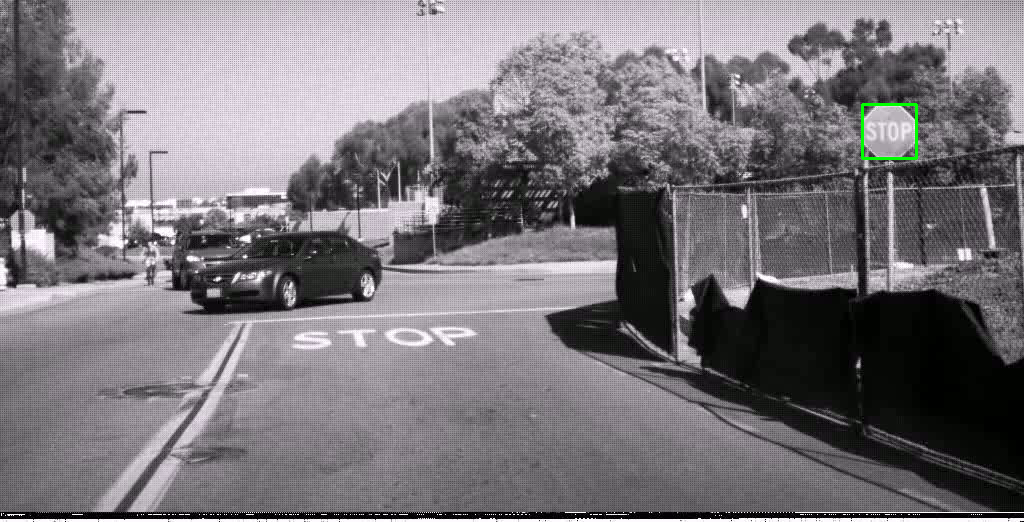

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
k='/content/data/aiua120214-0/frameAnnotations-DataLog02142012_external_camera.avi_annotations/stop_1330545910.avi_image0.png'
for label,startx,starty,endx,endy in D[k]:
  xmin=startx/w
  xmax=endx/w
  ymin=starty/h
  ymax=endy/h
  image=cv2.imread(k)
  startx=int(startx)
  starty=int(starty)
  endx=int(endx)
  endy=int(endy)
  cv2.rectangle(image, (startx, starty), (endx, endy),(0, 255, 0), 2)  
  cv2_imshow(image)

In [ ]:
!wget http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet101_coco_2018_01_28.tar.gz
!tar -zxvf faster_rcnn_resnet101_coco_2018_01_28.tar.gz

--2020-04-28 04:44:53--  http://download.tensorflow.org/models/object_detection/faster_rcnn_resnet101_coco_2018_01_28.tar.gz
Resolving download.tensorflow.org (download.tensorflow.org)... 108.177.126.128, 2a00:1450:4013:c00::80
Connecting to download.tensorflow.org (download.tensorflow.org)|108.177.126.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 593445323 (566M) [application/x-tar]
Saving to: ‘faster_rcnn_resnet101_coco_2018_01_28.tar.gz’

faster_rcnn_resnet1 100%[===================>] 565.95M  40.1MB/s    in 14s     

2020-04-28 04:45:07 (41.6 MB/s) - ‘faster_rcnn_resnet101_coco_2018_01_28.tar.gz’ saved [593445323/593445323]

faster_rcnn_resnet101_coco_2018_01_28/
faster_rcnn_resnet101_coco_2018_01_28/model.ckpt.index
faster_rcnn_resnet101_coco_2018_01_28/checkpoint
faster_rcnn_resnet101_coco_2018_01_28/pipeline.config
faster_rcnn_resnet101_coco_2018_01_28/model.ckpt.data-00000-of-00001
faster_rcnn_resnet101_coco_2018_01_28/model.ckpt.meta
faster_rcnn_

In [ ]:
#Upload the config file from Desktop
# Upload the classes.pbtext (Note: it uses the wrong quotation marks so modify it in the Desktop) [Change the quotation marks they're wrong]
!rm /content/models/research/object_detection/samples/configs/faster_rcnn_resnet101_pets.config
!mv '/content/faster_rcnn_resnet101_pets .config' /content/models/research/object_detection/samples/configs/faster_rcnn_resnet101_pets.config
!mv /content/classes.pbtext /content/data/records/


In [ ]:
!python /content/models/research/object_detection/model_main.py --logtostderr  --pipeline_config_path /content/models/research/object_detection/samples/configs/faster_rcnn_resnet101_pets.config  --train_dir /content/data/

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



W0428 04:45:41.805748 140114040854400 module_wrapper.py:139] From /content/models/research/object_detection/utils/config_util.py:102: The name tf.gfile.GFile is deprecated. Please use tf.io.gfile.GFile instead.


W0428 04:45:41.809098 140114040854400 module_wrapper.py:139] From /content/models/research/object_detection/model_lib.py:628: The name tf.logging.warning is deprecated. Please use tf.compat.v1.logging.warning instead.

W0428 04:45:41.809239 140114040854400 model_lib.py:629] Forced number of epochs for all eval validations to be 1.

W0428 04:45:41.809360 140114040854400 module_wrapper.py:139] From /content/models/resea